In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from salary import compute_yearly_value, get_net_salary

plt.style.use("ggplot")

In [2]:
GROSS_ANNUAL = 50000
GROSS_MONTHLY = GROSS_ANNUAL / 12

MINIMUM_WAGE_NET = 991

PCTS = [0.0, 0.25, 0.5, 0.75]

In [3]:
value_df = compute_yearly_value(gross = GROSS_MONTHLY, pct = 0, price=50.03, 
                                reduction_months=['APR', 'MAY', 'JUN'])

value_df = value_df.add_suffix("-" + str(0.0))

for pct in PCTS[1:]:
    
    _value_df = compute_yearly_value(gross = GROSS_MONTHLY, pct = pct, price=50.03, 
                                     reduction_months=['APR', 'MAY', 'JUN'])
    
    _value_df = _value_df.add_suffix("-" + str(pct))
    
    value_df = pd.concat([value_df, _value_df], axis = 1)

100%|██████████| 12/12 [00:14<00:00,  1.21s/it]


In [20]:
def get_pct(name):
    _elements = name.split('-')
    return _elements[-1]

In [138]:
# Perceived salary
net_salary_df = value_df.filter(regex = "salaryNet").copy()
net_salary_df = net_salary_df.rename(mapper = get_pct, axis = 1)

net_salary_df["2000 EUR"]   = 2000
net_salary_df["1500 EUR"]   = 1500
net_salary_df["MW"] = 991

# Shares actual value
net_shares_value_df = value_df.filter(regex = "sharesNet").rename(mapper = get_pct, axis = 1)

# Total value if shares could be sold
net_total_value_df  = value_df.filter(regex = "Net").groupby(by = get_pct, axis = 1).sum()

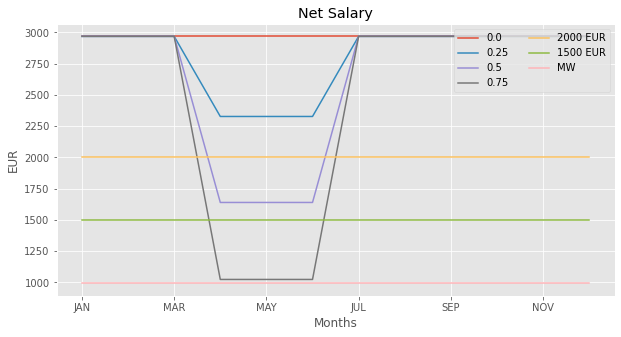

In [141]:
ax = net_salary_df.plot(title = "Net Salary", figsize = (10, 5))

plt.ylabel("EUR")
plt.xlabel("Months")
plt.legend(ncol = 2, loc = "upper right")

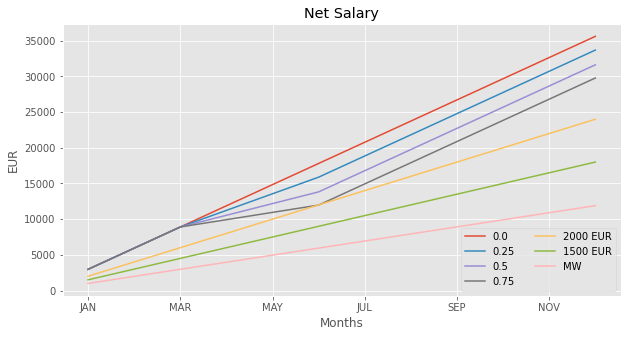

In [140]:
net_salary_df.cumsum().plot(logy=False, title = "Net Salary", figsize = (10, 5))

plt.ylabel("EUR")
plt.xlabel("Months")
plt.legend(ncol = 2, loc = "lower right")

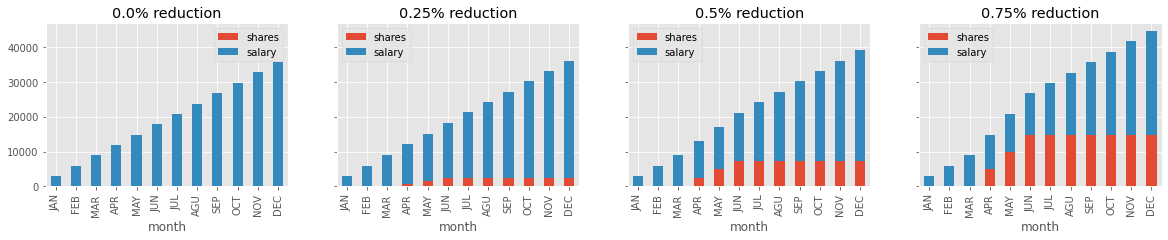

In [164]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize = (20, 3), 
                       sharey=True, sharex = True, gridspec_kw = {'hspace':0.5})

ax = ax.flatten()

for pct, axes in zip(net_shares_value_df.columns, ax):

    _df = pd.concat([net_shares_value_df, net_salary_df], axis = 1)[pct]

    _df.columns = ["shares", "salary"]

    _df.cumsum().plot.bar(stacked=True, ax = axes)
    axes.set_title(f"{pct}% reduction")

Text(0, 0.5, '%')

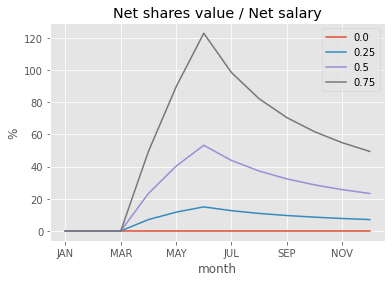

In [182]:
ratio_df = pd.DataFrame(index = net_shares_value_df.index, 
                     columns = net_shares_value_df.columns)

for pct in net_shares_value_df.columns:

    _df = pd.concat([net_shares_value_df, net_salary_df], axis = 1)[pct]

    _df.columns = ["shares", "salary"]

    _cumsum_df = _df.cumsum()
    
    ratio_df[pct] = _cumsum_df["shares"] / _cumsum_df["salary"]

ratio_df.mul(100).plot(title = "Net shares value / Net salary")

plt.ylabel("%")